In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("data_bank.csv")

In [3]:
df.head()

,variance,skewness,curtosis,entropy,target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
print(df.shape)

(1372, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance     1372 non-null float64
skewness     1372 non-null float64
curtosis     1372 non-null float64
entropy      1372 non-null float64
target       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.isnull().sum()

variance     0
skewness     0
curtosis     0
entropy      0
target       0
dtype: int64

In [7]:
df.describe()

,variance,skewness,curtosis,entropy,target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
df["target"].value_counts()

0    762
1    610
Name: target, dtype: int64

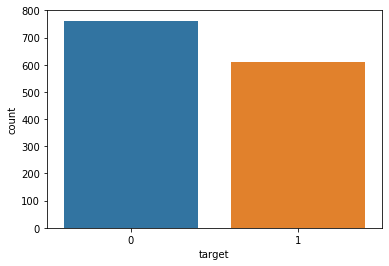

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(x="target",data=df)
plt.show()

In [10]:
df.corr()

,variance,skewness,curtosis,entropy,target
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
target,-0.724843,-0.444688,0.155883,-0.023424,1.000000


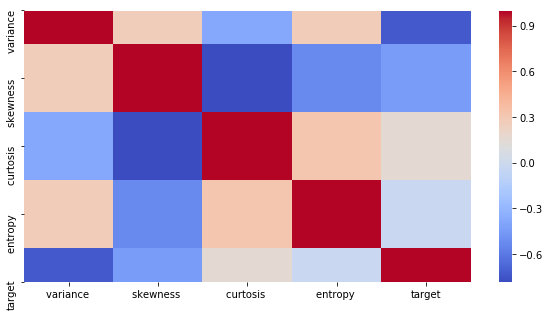

In [17]:
plt.figure(figsize=(3,5))
sns.heatmap(df.corr(),cbar=True,cmap='coolwarm')

Split the data into features and target

In [12]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 4)
(412, 4)
(960,)
(412,)


# Create & train model

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [18]:
clf=DecisionTreeClassifier(random_state=1)

In [19]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

Predicting the results

In [20]:
y_pred=clf.predict(X_test)

In [21]:
y_pred[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [22]:
confusion_matrix(y_test,y_pred)

array([[220,   8],
       [  4, 180]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       228
           1       0.96      0.98      0.97       184

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



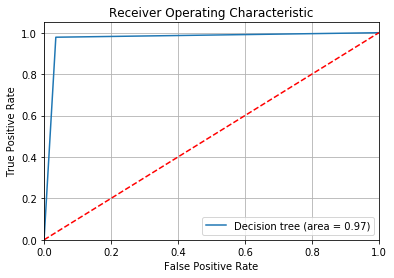

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Dtree_ROC')
plt.grid(True)
plt.show()

In [25]:
y_prednew=clf.predict(X_train)

In [26]:
confusion_matrix(y_train,y_prednew)

array([[534,   0],
       [  0, 426]], dtype=int64)

In [27]:
clf.feature_importances_

array([0.62446629, 0.25403086, 0.11447144, 0.00703141])